# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
# Sample data
data = pd.read_csv('Houseprice.csv')
data

,Date,Region ID,Region Name,Region Type,State Name,Home Value Index,Size Rank
0,7/31/03,395162,"Torrington, CT",msa,CT,206829.9543,236
1,8/31/03,395162,"Torrington, CT",msa,CT,209576.4668,236
2,9/30/03,395162,"Torrington, CT",msa,CT,212398.5270,236
3,10/31/03,395162,"Torrington, CT",msa,CT,215175.9703,236
4,11/30/03,395162,"Torrington, CT",msa,CT,217573.4558,236
...,...,...,...,...,...,...,...
255965,3/31/17,394776,"Laurel, MS",msa,MS,107746.9037,434
255966,3/31/17,395124,"Starkville, MS",msa,MS,169984.2309,529
255967,3/31/17,394490,"Columbus, MS",msa,MS,125443.1976,543
255968,3/31/17,394977,"Picayune, MS",msa,MS,150324.7686,559


# Loading and Preprocessing Data

In [2]:
# Sample data
data = pd.read_csv('Houseprice.csv')
data = data[data['Region Name'] == 'Salt Lake City, UT']
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
df = pd.DataFrame(data)
df = df[['Date', 'Home Value Index']]
df

,Date,Home Value Index
163600,2000-01-31,173370.8057
163605,2000-02-29,173473.7350
163610,2000-03-31,173659.8637
163615,2000-04-30,174086.9221
163620,2000-05-31,175910.0283
...,...,...
165005,2023-06-30,524735.4525
165010,2023-07-31,526616.8991
165015,2023-08-31,528841.3976
165020,2023-09-30,530407.2567


# Data Exploration and Preparation

In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Normalization and Train-Test Split

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create lag features for the lookback
look_back = 5
for i in range(1, look_back + 1):
    df[f'lag_{i}'] = df['Home Value Index'].shift(i)

# Drop rows with NaN values
df.dropna(inplace=True)

# Splitting data into training and testing
train_size = int(len(scaled_data) * 0.9)
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [5]:
# Convert array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Creating Random Forest Regressor Model


In [6]:
# Create Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), Y_train)

RandomForestRegressor(random_state=42)

# Making Predictions and Evaluating the Model


In [7]:
# Make predictions
train_predict = rf_model.predict(X_train.reshape(X_train.shape[0], -1))
test_predict = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test_inv = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_rmse = np.sqrt(np.mean((train_predict[:,0] - Y_train_inv[0])**2))
test_rmse = np.sqrt(np.mean((test_predict[:,0] - Y_test_inv[0])**2))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 773.2005725708922
Test RMSE: 92753.70403390235


# Visualizing Training Results


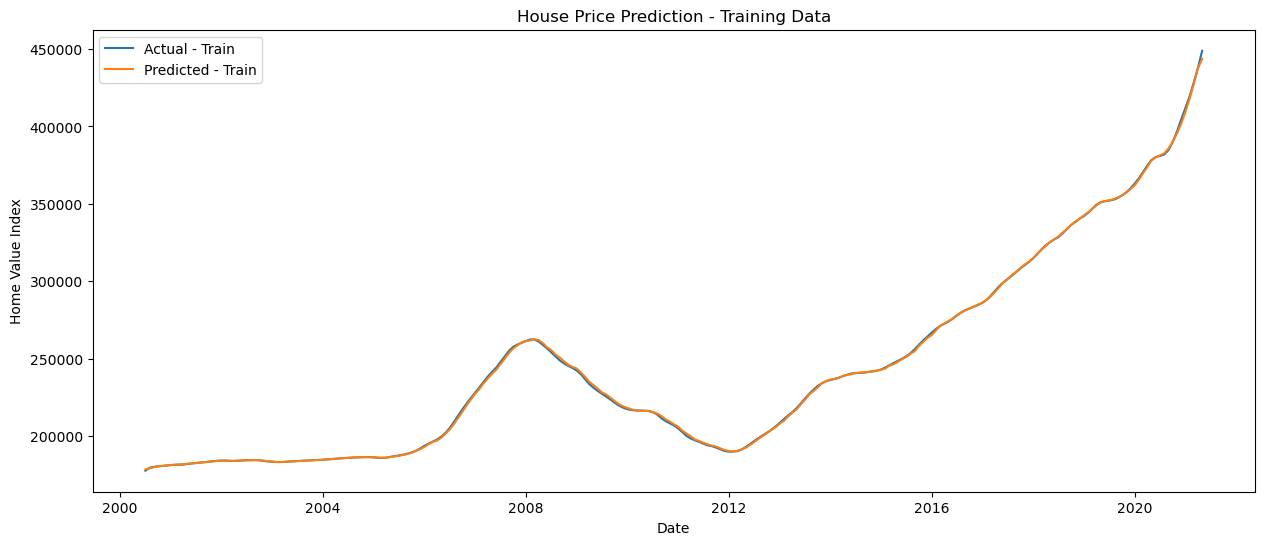

In [8]:
# Plotting Train Data
plt.figure(figsize=(15, 6))
plt.plot(df.index[:len(train_predict)], Y_train_inv[0], label='Actual - Train')
plt.plot(df.index[:len(train_predict)], train_predict[:, 0], label='Predicted - Train')
plt.title('House Price Prediction - Training Data')
plt.xlabel('Date')
plt.ylabel('Home Value Index')
plt.legend()
plt.show()

# Visualizing Testing Results


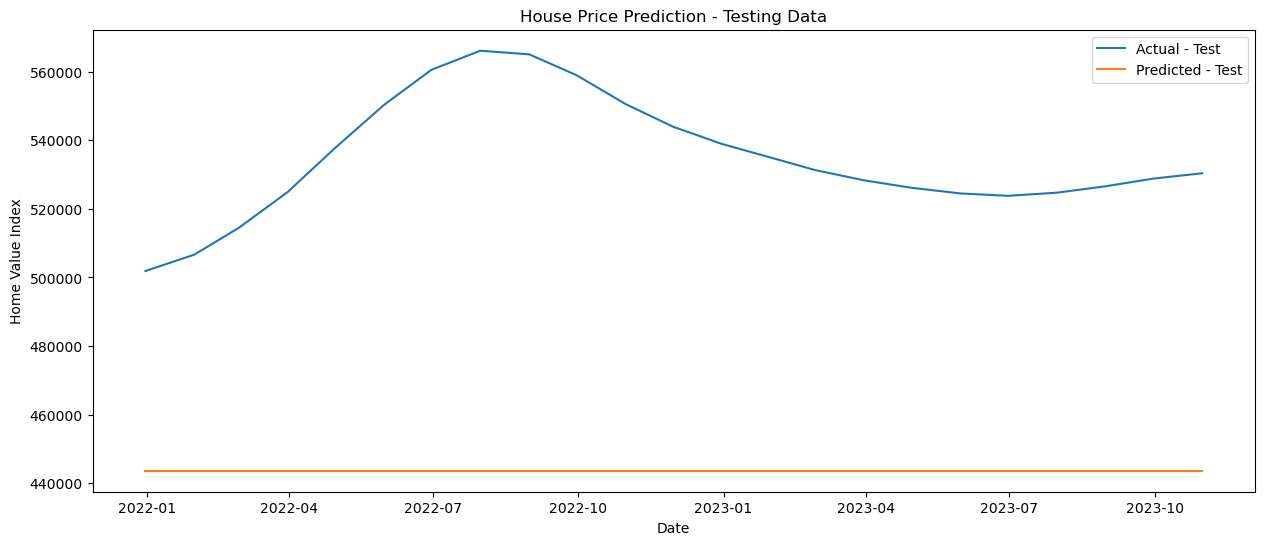

In [9]:
# Plotting Test Data
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(test_predict):], Y_test_inv[0], label='Actual - Test')
plt.plot(df.index[-len(test_predict):], test_predict[:, 0], label='Predicted - Test')
plt.title('House Price Prediction - Testing Data')
plt.xlabel('Date')
plt.ylabel('Home Value Index')
plt.legend()
plt.show()


# Generating Future Predictions
# Visualizing Test Data and Future Predictions

            Predicted Future Value
2023-12-01            443618.09339
2024-01-01            443618.09339
2024-02-01            443618.09339
2024-03-01            443618.09339
2024-04-01            443618.09339
2024-05-01            443618.09339
2024-06-01            443618.09339
2024-07-01            443618.09339
2024-08-01            443618.09339
2024-09-01            443618.09339
2024-10-01            443618.09339
2024-11-01            443618.09339
2024-12-01            443618.09339
2025-01-01            443618.09339
2025-02-01            443618.09339
2025-03-01            443618.09339
2025-04-01            443618.09339
2025-05-01            443618.09339
2025-06-01            443618.09339
2025-07-01            443618.09339
2025-08-01            443618.09339
2025-09-01            443618.09339
2025-10-01            443618.09339
2025-11-01            443618.09339


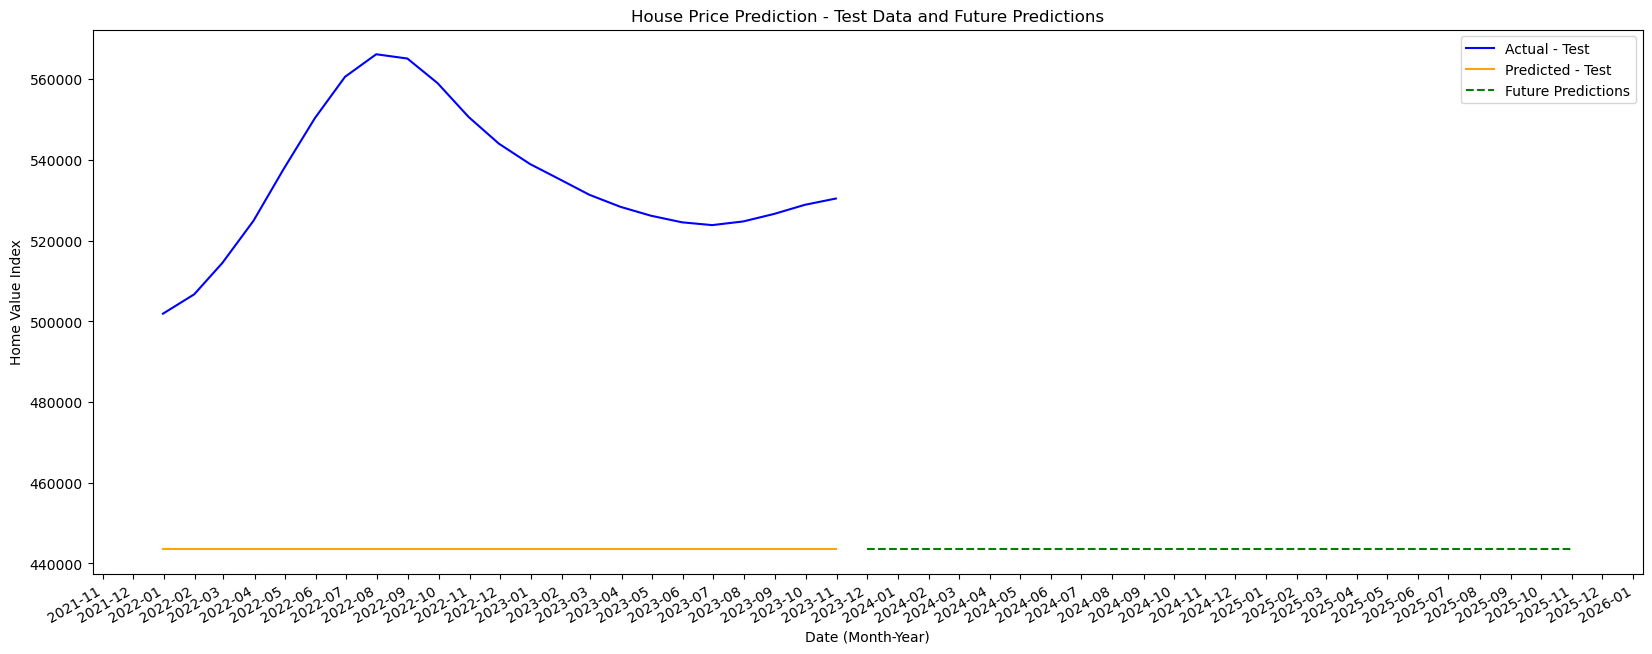

In [10]:
# Assuming look_back = 5 as used earlier
future_months = 24
future_predictions = []
current_input = scaled_data[-look_back:].flatten()  # Start with the last known data

for _ in range(future_months):
    # Predict the next step
    next_prediction = rf_model.predict([current_input])
    
    # Append the prediction
    future_predictions.append(next_prediction[0])
    
    # Update the input sequence
    current_input = np.append(current_input[1:], next_prediction[0])

# Inverse transform to get actual value predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Adjust the date generation to reflect monthly steps
last_date = df.index[-1]
prediction_dates = pd.date_range(start=last_date, periods=future_months + 1, freq='MS')[1:]  # Start from the next month
future_df = pd.DataFrame(future_predictions, index=prediction_dates, columns=['Predicted Future Value'])

print(future_df)

# Plotting Future Predictions
plt.figure(figsize=(20, 8))

# Plot actual and predicted test data
plt.plot(df.index[-len(test_predict):], Y_test_inv[0], label='Actual - Test', color='blue')
plt.plot(df.index[-len(test_predict):], test_predict[:, 0], label='Predicted - Test', color='orange')

# Plot future predictions
plt.plot(future_df.index, future_df['Predicted Future Value'], label='Future Predictions', color='green', linestyle='dashed')

# Formatting the x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.title('House Price Prediction - Test Data and Future Predictions')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Home Value Index')
plt.legend()
plt.show()
